# Word Clouds

Here, we're going to use the script of the show The Office (US version) to make a few different word clouds. We're using schrutepy, a library that already has all the text from the show and other informations.

## Libraries

In [1]:
from schrutepy import schrutepy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

#nltk.download('stopwords')

## Acquiring the Data

Here, we get our dataset, check null values and delete them, since it's a small amount.

In [2]:
data = schrutepy.load_schrute()
data.head()

,index,season,episode,episode_name,director,writer,character,text,text_w_direction
0,1,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,All right Jim. Your quarterlies look very good...,All right Jim. Your quarterlies look very good...
1,2,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Oh, I told you. I couldn't close it. So...","Oh, I told you. I couldn't close it. So..."
2,3,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,So you've come to the master for guidance? Is ...,So you've come to the master for guidance? Is ...
3,4,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Actually, you called me in here, but yeah.","Actually, you called me in here, but yeah."
4,5,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,"All right. Well, let me show you how it's done.","All right. Well, let me show you how it's done."


In [3]:
data.isna().sum()

index                 0
season                0
episode               0
episode_name          0
director              0
writer                0
character             0
text                374
text_w_direction      5
dtype: int64

In [4]:
data = data.dropna()
data.isna().sum()

index               0
season              0
episode             0
episode_name        0
director            0
writer              0
character           0
text                0
text_w_direction    0
dtype: int64

In [32]:
#data['character'].unique() #show every different character on the show, as well as lines spoken by more than one character

With the null values cleaned, we're going to see wich characters have more lines in the show. First we can see the values, then we'll have a plot in order to have a better visualization.

In [6]:
group = data.groupby(['character']).size().sort_values(ascending = False)
group

character
Michael            10877
Dwight              6801
Jim                 6268
Pam                 5006
Andy                3739
                   ...  
Jim's voicemail        1
Jim's Dad              1
Jim and Dwight         1
Jim & Pam              1
song                   1
Length: 761, dtype: int64

[Text(0.5, 1.0, 'Number of lines per character')]

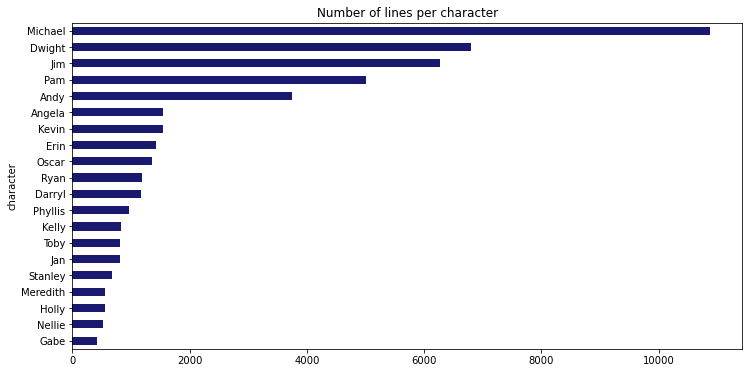

In [7]:
group_plot = group[0:20]
group_plot = group_plot.sort_values(ascending = True)

plt.figure(figsize=(12,6))
group_plot.plot.barh(color = 'midnightblue').set(title='Number of lines per character')

## Making our Clouds

First, we need to get our stopwords, so we don't have unuseful words and punctuations in our clouds.

In [8]:
stops = stopwords.words('english')

Now, we create new datasets for ou characters, and then get the texts from them. I choose only the four main characters here, Jim, Pam, Michael and Dwight.

In [9]:
jim = data[data.character == 'Jim']
jim_text = ' '.join(review for review in jim.text)

pam = data[data.character == 'Pam']
pam_text = ' '.join(review for review in pam.text)

dwight = data[data.character == 'Dwight']
dwight_text = ' '.join(review for review in dwight.text)

michael = data[data.character == 'Michael']
michael_text = ' '.join(review for review in michael.text)

With our text ready, we can now create and plot our wordclouds. The first two will be Michael's and Pam's, with a common square wordcloud.

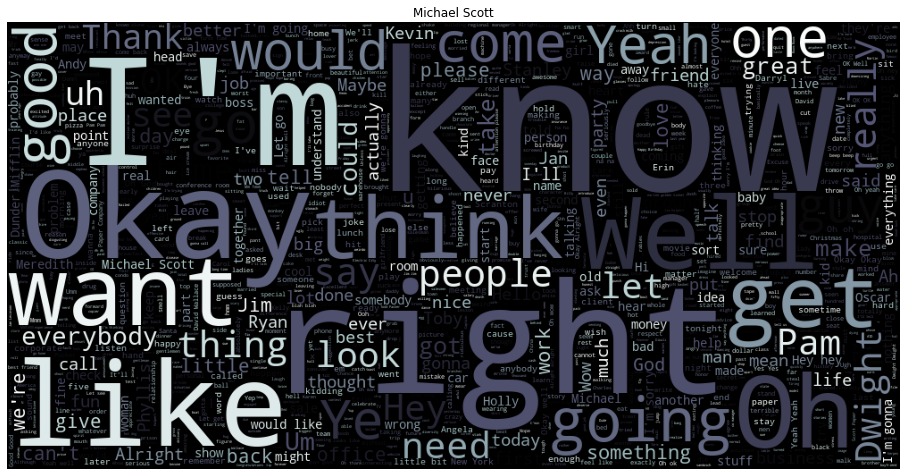

In [30]:
m_cloud = WordCloud(background_color='black', max_words=2000, stopwords=stops, 
                    colormap='bone', width=1000, height=500)
m_cloud.generate(michael_text)

plt.figure(figsize=(16,9))
plt.title('Michael Scott')
plt.imshow(m_cloud)
plt.axis('off')
plt.show()

#plt.savefig('michael_wordcloud.jpg')

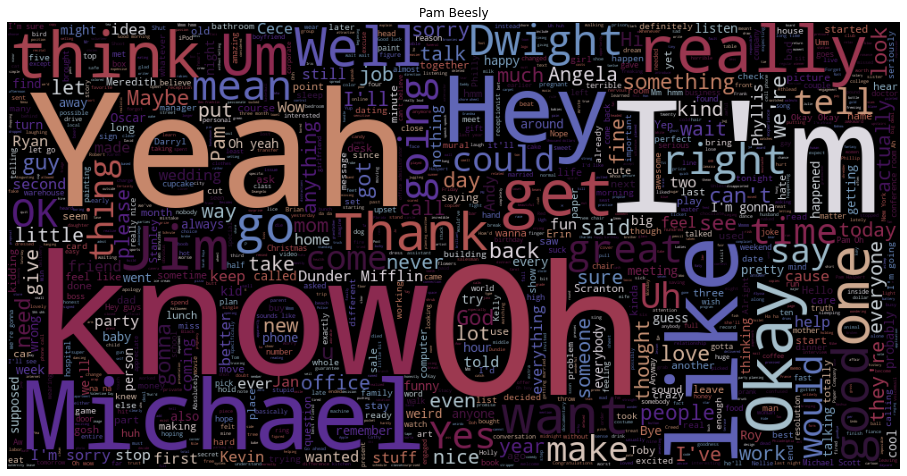

In [29]:
p_cloud = WordCloud(background_color='black', max_words=2000, stopwords=stops,
                   colormap='twilight', width=1000, height=500)
p_cloud.generate(pam_text)

plt.figure(figsize=(16,9))
plt.title('Pam Beesly')
plt.imshow(p_cloud)
plt.axis('off')
plt.show()

#plt.savefig('pam_wordcloud.jpg')

Now that we understand how it works, let's add an image to our wordclouds. It wasn't easy to find good images that fit here, since most of then had too much color and small details.
First, we create our mask, converting our images to a numpy array, and then we make our wordclouds almost the same way we did before.

In [33]:
jim_mask = np.array(Image.open('jim.png').convert('RGB')) #need to be converted to rgb because it was a greyscale image
dwight_mask = np.array(Image.open('dwight.png'))

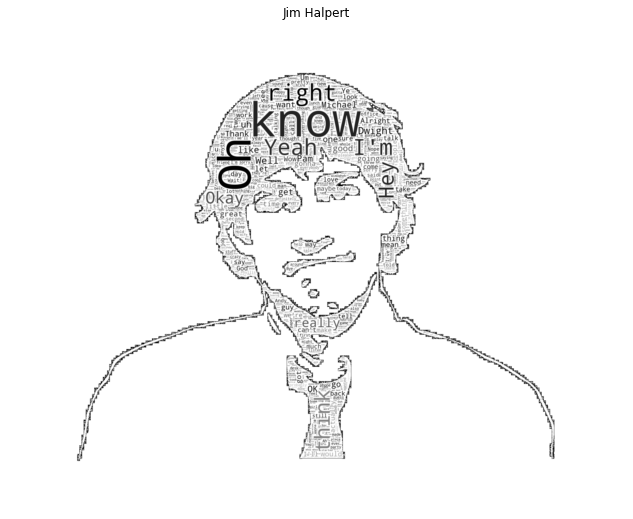

In [28]:
j_cloud = WordCloud(background_color='white', max_words=2000, mask=jim_mask,
                   stopwords=stops, contour_width=1,contour_color='black')
j_cloud.generate(jim_text)

image_colors = ImageColorGenerator(jim_mask)
plt.figure(figsize=(16,9))
plt.title('Jim Halpert')
plt.imshow(j_cloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()

#plt.savefig('jim_wordcloud.jpg')

Not so bad result. Everything is a little small, but this was the best image I could find that worked.

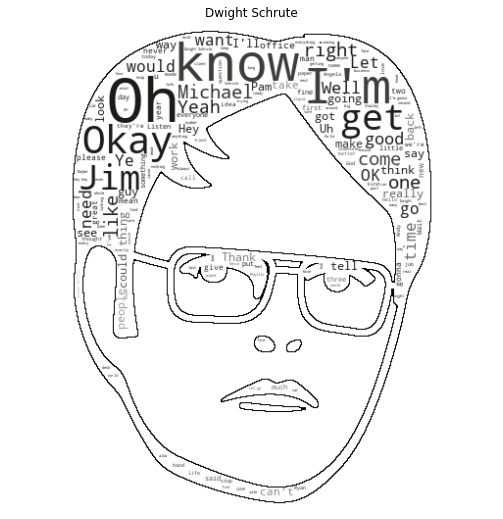

In [23]:
d_cloud = WordCloud(background_color='white', max_words=2000, mask=dwight_mask,
                   stopwords=stops, contour_width=1,contour_color='black')
d_cloud.generate(dwight_text)

image_colors = ImageColorGenerator(dwight_mask)
plt.figure(figsize=(16,9))
plt.title('Dwight Schrute')
plt.imshow(d_cloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()

#plt.savefig('dwight_wordcloud.jpg')

This is my favorite one, some words are too small, but most of then are readable. The contour was nice, and Dwight's face is easy recognizable.